# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ramadhani Latief Firmansyah
- **Email:** ramadhani.latief1203@mail.ugm.ac.id
- **ID Dicoding:** ramadhani_latief12

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan berbagi sepeda selama periode waktu tertentu?
- Bagaimana tren penggunaan berbagi sepeda berdasarkan jam, hari, bulan, dan tahun?
- Bagaimana tren penggunaan berbagi sepeda pada saat hari libur atau bukan hari libur dan pada saat hari kerja atau bukan hari kerja?
- Bagaimana pengaruh musim dalam penggunaan berbagi sepeda?
- Bagaimana kondisi cuaca memengaruhi penggunaan berbagi sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Data Wrangling

### Gathering Data

In [ ]:
#Memuat tabel day
day_df = pd.read_csv('/content/drive/MyDrive/Dicoding/day.csv') #Untuk memuat tabel day menjadi DataFrame
day_df.head() #Untuk menampilkan 5 baris pertama dari DataFrame day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Memuat tabel hour
hour_df = pd.read_csv('/content/drive/MyDrive/Dicoding/hour.csv') #Untuk memuat tabel hour menjadi DataFrame
hour_df.head() #Untuk menampilkan 5 baris pertama dari DataFrame day_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada tabel day terdapat 17 kolom yang berisi data numerik
- Pada tabel hour terdapat 18 kolom yang berisi data numerik

### Assessing Data

In [ ]:
#Menilai data tabel day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
#Untuk memeriksa duplikasi data pada tabel day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
#Untuk memeriksa parameter statistik dari kolom numerik yang terdapat dalam tabel day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#Menilai data tabel hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#Untuk memeriksa duplikasi data pada tabel hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
#Untuk memeriksa parameter statistik dari kolom numerik yang terdapat dalam tabel hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing value dalam tabel day_df maupun tabel hour_df
- Tidak ada duplikasi data dalam tabel day_df maupun tabel hour_df
- Terdapat kesalahan tipe data untuk kolom dteday pada tabel day_df maupun tabel hour_df. Kolom tersebut seharusnya direpresentasikan sebagai tipe data datetime, bukan object
- Tabel day_df memiliki jumlah data sebanyak 731 data dan tabel hour_df memiliki jumlah data sebanyak 17379 data
- Tidak ada keanehan pada hasil parameter statistik dari kolom numerik yang terdapat dalam tabel day_df maupun tabel hour_df

### Cleaning Data

In [ ]:
#Untuk mengubah tipe data pada kolom dteday dalam tabel day_df menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [ ]:
#Untuk mengganti nilai numerik pada kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit dalam tabel day_df menjadi nilai nilai kategorik atau numerik yang sesuai untuk memudahkan analisis data
day_df["season"] = day_df["season"].replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
day_df["yr"] = day_df["yr"].replace({0: 2011, 1: 2012})
day_df["mnth"] = day_df["mnth"].replace({1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"})
day_df["holiday"] = day_df["holiday"].replace({0: "not holiday", 1: "holiday"})
day_df["weekday"] = day_df["weekday"].replace({0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"})
day_df["workingday"] = day_df["workingday"].replace({0: "not workingday", 1: "workingday"})
day_df["weathersit"] = day_df["weathersit"].replace({1: "clear", 2: "mist", 3: "light rain", 4: "heavy rain"})

In [ ]:
day_df.head() #Untuk menampilkan 5 baris pertama dari DataFrame day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,January,not holiday,Saturday,not workingday,mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,January,not holiday,Sunday,not workingday,mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,January,not holiday,Monday,workingday,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,January,not holiday,Tuesday,workingday,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,January,not holiday,Wednesday,workingday,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Menilai data tabel day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
#Untuk mengubah tipe data pada kolom dteday dalam tabel hour_df menjadi datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [ ]:
#Untuk mengganti nilai numerik pada kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit dalam tabel hour_df menjadi nilai kategorik atau numerik yang sesuai untuk memudahkan analisis data
hour_df["season"] = hour_df["season"].replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
hour_df["yr"] = hour_df["yr"].replace({0: 2011, 1: 2012})
hour_df["mnth"] = hour_df["mnth"].replace({1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"})
hour_df["holiday"] = hour_df["holiday"].replace({0: "not holiday", 1: "holiday"})
hour_df["weekday"] = hour_df["weekday"].replace({0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"})
hour_df["workingday"] = hour_df["workingday"].replace({0: "not workingday", 1: "workingday"})
hour_df["weathersit"] = hour_df["weathersit"].replace({1: "clear", 2: "mist", 3: "light rain", 4: "heavy rain"})

In [ ]:
hour_df.head() #Untuk menampilkan 5 baris pertama dari DataFrame hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,January,0,not holiday,Saturday,not workingday,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,January,1,not holiday,Saturday,not workingday,clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,January,2,not holiday,Saturday,not workingday,clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,January,3,not holiday,Saturday,not workingday,clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,January,4,not holiday,Saturday,not workingday,clear,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
#Menilai data tabel hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
#Untuk menggabungkan tabel day_df dengan tabel hour_df untuk memudahkan analisis data
hour_agg_df = hour_df.groupby(by=['dteday'], as_index=False).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}) #Untuk membuat tabel hour_agg_df yang diperoleh dari mengelompokkan data casual, registered, dan cnt dalam tabel hour_df berdasarkan kolom dteday

day_hour_df = hour_df.merge(hour_agg_df, on='dteday', suffixes=('', '_sum')) #Untuk menggabungkan tabel hour_df dengan tabel hour_agg_df
day_hour_df = day_hour_df.sort_values(by=['dteday', 'hr']).reset_index(drop=True) #Untuk mengurutkan data dalam tabel day_hour_df berdasarkan kolom dteday dan hr
day_hour_df = day_hour_df.drop('instant', axis=1) #Untuk menghilangkan atau menghapus kolom instant dalam tabel day_hour_df

In [ ]:
day_hour_df.head() #Untuk menampilkan 5 baris pertama dari DataFrame day_hour_df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,casual_sum,registered_sum,cnt_sum
0,2011-01-01,spring,2011,January,0,not holiday,Saturday,not workingday,clear,0.24,0.2879,0.81,0.0,3,13,16,331,654,985
1,2011-01-01,spring,2011,January,1,not holiday,Saturday,not workingday,clear,0.22,0.2727,0.80,0.0,8,32,40,331,654,985
2,2011-01-01,spring,2011,January,2,not holiday,Saturday,not workingday,clear,0.22,0.2727,0.80,0.0,5,27,32,331,654,985
3,2011-01-01,spring,2011,January,3,not holiday,Saturday,not workingday,clear,0.24,0.2879,0.75,0.0,3,10,13,331,654,985
4,2011-01-01,spring,2011,January,4,not holiday,Saturday,not workingday,clear,0.24,0.2879,0.75,0.0,0,1,1,331,654,985


In [ ]:
#Menilai data tabel day_hour_df
day_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dteday          17379 non-null  datetime64[ns]
 1   season          17379 non-null  object        
 2   yr              17379 non-null  int64         
 3   mnth            17379 non-null  object        
 4   hr              17379 non-null  int64         
 5   holiday         17379 non-null  object        
 6   weekday         17379 non-null  object        
 7   workingday      17379 non-null  object        
 8   weathersit      17379 non-null  object        
 9   temp            17379 non-null  float64       
 10  atemp           17379 non-null  float64       
 11  hum             17379 non-null  float64       
 12  windspeed       17379 non-null  float64       
 13  casual          17379 non-null  int64         
 14  registered      17379 non-null  int64         
 15  cn

**Insight:**
- Tipe data untuk kolom dteday pada tabel day_df maupun tabel hour_df sudah diubah menjadi datetime
- Nilai numerik pada kolom season, yr, mnth, holiday, weekday, workingday, dan weather pada tabel day_df maupun tabel hour_df sudah diubah menjadi nilai (kategorik atau numerik) yang sesuai untuk memudahkan analisis data

## Exploratory Data Analysis (EDA)

### Eksplorasi Data day_df

In [ ]:
#Untuk memeriksa parameter statistik dari kolom numerik yang terdapat dalam tabel day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,January,not holiday,Saturday,workingday,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_df berdasarkan kolom yr
day_df.groupby(by=["yr"], sort=False).agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "max", "min", "mean", "std"]
})

casual                                    registered             \
         sum   max min         mean         std        sum   max  min   
yr                                                                      
2011  247252  3065   9   677.402740  556.269121     995851  4614  416   
2012  372765  3410   2  1018.483607  758.989897    1676811  6946   20   

                                    cnt                                       
             mean          std      sum   max  min         mean          std  
yr                                                                            
2011  2728.358904  1060.110413  1243103  6043  431  3405.761644  1378.753666  
2012  4581.450820  1424.331846  2049576  8714   22  5599.934426  1788.667868

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_df berdasarkan kolom yr dan mnth
day_df.groupby(by=["yr", "mnth"], sort=False).agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "max", "min", "mean", "std"]
})

casual                                     registered        \
                  sum   max  min         mean         std        sum   max   
yr   mnth                                                                    
2011 January     3073   331    9    99.129032   72.503215      35116  1844   
     February    6242   694   47   222.928571  193.234827      41973  2348   
     March      12826  1424   46   413.741935  332.841501      51219  2355   
     April      22346  1965  121   744.866667  497.720787      72524  3722   
     May        31050  2355  255  1001.612903  525.722530     104771  4238   
     June       30612  1920  513  1020.400000  458.669861     112900  4488   
     July       36452  3065  562  1175.870968  665.455420     104889  4220   
     August     28842  1914  226   930.387097  359.765449     107849  4614   
     September  26545  2521  118   884.833333  599.444173     100873  4372   
     October    25222  2397   57   813.612903  617.780796      98289  4267   
     November   15594  1275   69   519.800000  374.552091      86573  3891   
     December    8448   706   50   272.516129  168.638048      78875  3672   
2012 January     8969  1070   67   289.322581  235.103295      87775  4185   
     February    8721  1435   65   300.724138  262.347084      94416  4546   
     March      31618  3155  203  1019.935484  701.334392     133257  5893   
     April      38456  3252  120  1281.866667  843.933922     135768  5950   
     May        44235  3410  342  1426.935484  888.284562     151630  6433   
     June       43294  2963  477  1443.133333  770.864527     159536  6456   
     July       41705  2562  747  1345.322581  519.993166     161902  6790   
     August     43197  2827  935  1393.451613  449.915462     171306  6541   
     September  43778  3160  371  1459.266667  761.049273     174795  6946   
     October    34538  3031    2  1114.129032  759.714540     164303  6911   
     November   21009  2290  123   700.300000  542.275166     131655  5520   
     December   13245  1153    9   427.258065  244.896028     110468  6055   

                                                   cnt              \
                 min         mean          std     sum   max   min   
yr   mnth                                                            
2011 January     416  1132.774194   370.027540   38189  1985   431   
     February    905  1499.035714   331.779990   48215  2927  1005   
     March       491  1652.225806   402.395387   64045  3239   605   
     April       674  2417.466667   809.575143   94870  5312   795   
     May        2213  3379.709677   566.067911  135821  5805  2633   
     June       2993  3763.333333   439.945869  143512  5515  3767   
     July       2298  3383.516129   509.528074  141341  6043  3285   
     August      889  3479.000000   755.445608  136691  5895  1115   
     September  1689  3362.433333   773.177576  127418  5423  1842   
     October     570  3170.612903   810.102655  123511  5511   627   
     November    935  2885.766667   788.097915  102167  4486  1495   
     December    451  2544.354839   947.709082   87323  3940   705   
2012 January    1234  2831.451613   792.457689   96744  4521  1301   
     February   1456  3255.724138   839.594200  103137  5062  1529   
     March      2339  4298.612903   935.885487  164875  8362  3194   
     April       907  4525.600000  1056.822551  174224  7460  1027   
     May        2501  4891.290323   963.828761  195865  8294  2843   
     June       3594  5317.866667   802.526817  202830  8120  4127   
     July       3195  5222.645161   935.328447  203607  8173  4459   
     August     3341  5526.000000   942.817833  214503  7865  4549   
     September  3197  5826.500000  1065.437089  218573  8714  4073   
     October      20  5300.096774  1665.547865  198841  8156    22   
     November   1470  4388.500000  1112.181539  152664  6852  2277   
     December    432  3563.483871  1711.587409  123713  6606   441   

                 

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_df berdasarkan kolom mnth
day_df.groupby(by=["mnth"], sort=False).agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "max", "min", "mean", "std"]
})

casual                                     registered              \
             sum   max  min         mean         std        sum   max   min   
mnth                                                                          
January    12042  1070    9   194.225806  197.384490     122891  4185   416   
February   14963  1435   47   262.508772  232.283549     136389  4546   905   
March      44444  3155   46   716.838710  624.308094     184476  5893   491   
April      60802  3252  120  1013.366667  738.345585     208292  5950   674   
May        75285  3410  255  1214.274194  754.950311     256401  6433  2213   
June       73906  2963  477  1231.766667  664.017647     272436  6456  2993   
July       78157  3065  562  1260.596774  598.382778     266791  6790  2298   
August     72039  2827  226  1161.919355  466.576274     279155  6541   889   
September  70323  3160  118  1172.050000  738.378375     275668  6946  1689   
October    59760  3031    2   963.870968  703.205576     262592  6911    20   
November   36603  2290   69   610.050000  470.933096     218228  5520   935   
December   21693  1153    9   349.887097  222.634531     189343  6055   432   

                                        cnt                           \
                  mean          std     sum   max   min         mean   
mnth                                                                   
January    1982.112903  1053.274474  134933  4521   431  2176.338710   
February   2392.789474  1091.126003  151352  5062  1005  2655.298246   
March      2975.419355  1513.254354  228920  8362   605  3692.258065   
April      3471.533333  1414.571151  269094  7460   795  4484.900000   
May        4135.500000  1093.179612  331686  8294  2633  5349.774194   
June       4540.600000  1012.958885  346342  8120  3767  5772.366667   
July       4303.080645  1190.542490  344948  8173  3285  5563.677419   
August     4502.500000  1335.126601  351194  7865  1115  5664.419355   
September  4594.466667  1547.716749  345991  8714  1842  5766.516667   
October    4235.354839  1685.022519  322352  8156    22  5199.225806   
November   3637.133333  1219.589045  254831  6852  1495  4247.183333   
December   3053.919355  1465.052959  211036  6606   441  3403.806452   

                        
                   std  
mnth                    
January    1161.674370  
February   1145.313307  
March      1899.301812  
April      1776.160778  
May        1298.711561  
June       1240.400031  
July       1273.751871  
August     1494.516146  
September  1810.130649  
October    1988.392517  
November   1285.712709  
December   1549.639353

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_df berdasarkan kolom yr dan season
day_df.groupby(by=["yr", "season"], sort=False).agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "max", "min", "mean", "std"]
})

casual                                     registered        \
                sum   max  min         mean         std        sum   max   
yr   season                                                                
2011 spring   21425  1424    9   238.055556  252.609365     128575  2841   
     summer   77564  2355  121   843.086957  520.552109     269752  4414   
     fall     95450  3065  118  1015.425532  554.916801     324200  4614   
     winter   52813  2397   50   593.404494  504.441967     273324  4372   
2012 spring   39197  3155    9   430.736264  467.745345     282151  5315   
     summer  125958  3410  120  1369.108696  826.568007     445315  6456   
     fall    130641  3160  371  1389.797872  579.161622     510838  6917   
     winter   76969  3031    2   864.820225  669.109356     438507  6946   

                                                cnt                           \
              min         mean          std     sum   max   min         mean   
yr   season                                                                    
2011 spring   416  1428.611111   497.286269  150000  3239   431  1666.666667   
     summer   674  2932.086957   906.775638  347316  5805   795  3775.173913   
     fall     889  3448.936170   677.857596  419650  6043  1115  4464.361702   
     winter   570  3071.056180   786.175110  326137  5511   627  3664.460674   
2012 spring   432  3100.560440  1109.648415  321348  7836   441  3531.296703   
     summer   907  4840.380435  1010.116910  571273  8362  1027  6209.489130   
     fall    3195  5434.446809   985.186535  641479  8714  4073  6824.244681   
     winter    20  4927.044944  1355.921499  515476  8555    22  5791.865169   

                          
                     std  
yr   season               
2011 spring   614.012663  
     summer  1138.901028  
     fall     798.348077  
     winter   983.006128  
2012 spring  1341.203270  
     summer  1221.345569  
     fall     912.756191  
     winter  1598.520901

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_df berdasarkan kolom season
day_df.groupby(by=["season"], sort=False).agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "max", "min", "mean", "std"]
})

casual                                     registered             \
           sum   max  min         mean         std        sum   max  min   
season                                                                     
spring   60622  3155    9   334.928177  387.655561     410726  5315  416   
summer  203522  3410  120  1106.097826  737.590829     715067  6456  674   
fall    226091  3160  118  1202.611702  595.975032     835038  6917  889   
winter  129782  3031    2   729.112360  606.318118     711831  6946   20   

                                      cnt                           \
               mean          std      sum   max   min         mean   
season                                                               
spring  2269.204420  1200.269751   471348  7836   431  2604.132597   
summer  3886.233696  1353.375628   918589  8362   795  4992.331522   
fall    4441.691489  1304.626949  1061129  8714  1115  5644.303191   
winter  3999.050562  1444.782557   841613  8555    22  4728.162921   

                     
                std  
season               
spring  1399.942119  
summer  1695.977235  
fall    1459.800381  
winter  1699.615261

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_df berdasarkan kolom holiday
day_df.groupby(by=["holiday"], sort=False).agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "max", "min", "mean", "std"]
})

casual                                     registered             \
                sum   max  min         mean         std        sum   max  min   
holiday                                                                         
not holiday  597658  3410    2   841.771831  680.528529    2616586  6946   20   
holiday       22359  3065  117  1064.714286  860.046809      56076  5172  573   

                                           cnt                           \
                    mean          std      sum   max   min         mean   
holiday                                                                   
not holiday  3685.332394  1553.704431  3214244  8714    22  4527.104225   
holiday      2670.285714  1492.860246    78435  7403  1000  3735.000000   

                          
                     std  
holiday                   
not holiday  1929.013947  
holiday      2103.350660

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_df berdasarkan kolom weekday
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_df.groupby(by=["weekday"]).agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "max", "min", "mean", "std"]
}).reindex(days)

casual                                    registered              \
              sum   max min         mean         std        sum   max   min   
weekday                                                                       
Monday      70784  3065   2   674.133333  493.777298     384719  6435    20   
Tuesday     57843  1348   9   556.182692  342.748705     411266  6697   573   
Wednesday   57319  2562   9   551.144231  401.808954     415729  6946   432   
Thursday    61460  1405  15   590.961538  371.680307     423935  6781   416   
Friday      78238  2469  38   752.288462  483.422400     409552  6917  1129   
Saturday   153852  3410  57  1465.257143  927.082884     323955  5966   570   
Sunday     140521  3283  54  1338.295238  809.324777     303506  5657   451   

                                        cnt                           \
                  mean          std     sum   max   min         mean   
weekday                                                                
Monday     3663.990476  1504.215925  455503  7525    22  4338.123810   
Tuesday    3954.480769  1549.462149  469109  7767   683  4510.663462   
Wednesday  3997.394231  1723.710208  473048  8173   441  4548.538462   
Thursday   4076.298077  1642.753330  485395  7804   431  4667.259615   
Friday     3938.000000  1494.998698  487790  8362  1167  4690.288462   
Saturday   3085.285714  1358.068784  477807  8714   627  4550.542857   
Sunday     2890.533333  1179.713036  444027  8227   605  4228.828571   

                        
                   std  
weekday                 
Monday     1793.074013  
Tuesday    1826.911642  
Wednesday  2038.095884  
Thursday   1939.433317  
Friday     1874.624870  
Saturday   2196.693009  
Sunday     1872.496629

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_df berdasarkan kolom workingday
day_df.groupby(by=["workingday"], sort=False).agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "max", "min", "mean", "std"]
})

casual                                    registered        \
                   sum   max min         mean         std        sum   max   
workingday                                                                   
not workingday  316732  3410  54  1371.134199  873.064794     683537  5966   
workingday      303285  2469   2   606.570000  391.496032    1989125  6946   

                                                   cnt             \
                min         mean          std      sum   max  min   
workingday                                                          
not workingday  451  2959.034632  1293.867686  1000269  8714  605   
workingday       20  3978.250000  1568.692453  2292410  8362   22   

                                          
                       mean          std  
workingday                                
not workingday  4330.168831  2052.141245  
workingday      4584.820000  1878.415583

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_df berdasarkan kolom weathersit
day_df.groupby(by=["weathersit"], sort=False).agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "max", "min", "mean", "std"]
})

casual                                   registered             \
               sum   max min        mean         std        sum   max  min   
weathersit                                                                   
mist        169776  3155   9  687.352227  619.082767     827082  6844  491   
clear       446346  3410  15  964.030238  700.476488    1811606  6946  416   
light rain    3895  1264   2  185.476190  260.975022      33974  4324   20   

                                          cnt                          \
                   mean          std      sum   max  min         mean   
weathersit                                                              
mist        3348.510121  1463.566884   996858  8362  605  4035.862348   
clear       3912.755940  1533.347265  2257952  8714  431  4876.786177   
light rain  1617.809524  1068.290954    37869  4639   22  1803.285714   

                         
                    std  
weathersit               
mist        1809.109918  
clear       1879.483989  
light rain  1240.284449

**Insight**
- Jumlah pengguna berbagi sepeda bertipe casual setiap harinya dari tanggal 1 Januari 2011 hingga 31 Desember 2012 berkisar antara 2 hingga 3410 orang
- Jumlah pengguna berbagi sepeda bertipe registered setiap harinya dari tanggal 1 Januari 2011 hingga 31 Desember 2012 berkisar antara 20 hingga 6946 orang
- Jumlah pengguna berbagi sepeda setiap harinya dari tanggal 1 Januari 2011 hingga 31 Desember 2012 berkisar antara 22 hingga 8714 orang
- Jumlah pengguna berbagi sepeda bertipe casual pada tahun 2011 berjumlah 247252 orang sedangkan pada tahun 2012 berjumlah 372765 orang
- Jumlah pengguna berbagi sepeda bertipe registered pada tahun 2011 berjumlah 995851 orang sedangkan pada tahun 2012 berjumlah 1676811 orang
- Jumlah pengguna berbagi sepeda pada tahun 2011 berjumlah 1243103 orang sedangkan pada tahun 2012 berjumlah 2049576 orang
- Jumlah pengguna berbagi sepeda bertipe casual pada tahun 2011 paling banyak terdapat pada bulan Juli yaitu sebanyak 36452 orang, sedangkan pada tahun 2012 paling banyak terdapat pada bulan Mei yaitu sebanyak 44235 orang. Sementara itu, jumlah pengguna berbagi sepeda bertipe casual pada tahun 2011 paling sedikit terdapat pada bulan Januari yaitu sebanyak 3073 orang, sedangkan pada tahun 2012 paling sedikit terdapat pada bulan Februari yaitu sebanyak 8721 orang
- Jumlah pengguna berbagi sepeda bertipe registered pada tahun 2011 paling banyak terdapat pada bulan Juni yaitu sebanyak 112900 orang, sedangkan pada tahun 2012 paling banyak terdapat pada bulan September yaitu sebanyak 174795 orang. Sementara itu, jumlah pengguna berbagi sepeda bertipe registered pada tahun 2011 paling sedikit terdapat pada bulan Januari yaitu sebanyak 35116 orang, sedangkan pada tahun 2012 paling banyak terdapat pada bulan September yaitu sebanyak 87775 orang
- Jumlah pengguna berbagi sepeda pada tahun 2011 paling banyak terdapat pada bulan Juni yaitu sebanyak 143512 orang, sedangkan pada tahun 2012 paling banyak terdapat pada bulan September yaitu sebanyak 218573 orang. Sementara itu, jumlah pengguna berbagi sepeda pada tahun 2011 paling sedikit terdapat pada bulan Januari yaitu sebanyak 38189 orang, sedangkan pada tahun 2012 paling sedikit terdapat pada bulan Januari yaitu sebanyak 96744
- Jumlah pengguna berbagi sepeda bertipe casual paling banyak terdapat pada bulan Juli yaitu sebanyak 78157 orang, sedangkan paling sedikit terdapat pada bulan Januari yaitu sebanyak 12042 orang
- Jumlah pengguna berbagi sepeda bertipe registered paling banyak terdapat pada bulan Agustus yaitu sebanyak 279155 orang, sedangkan paling sedikit terdapat pada bulan Januari yaitu sebanyak 122891 orang
- Jumlah pengguna berbagi sepeda paling banyak terdapat pada bulan Agustus yaitu sebanyak 351194 orang, sedangkan paling sedikit terdapat pada bulan Januari yaitu sebanyak 134933 orang
- Jumlah pengguna berbagi sepeda bertipe registered paling banyak pada saat musim gugur (fall) yaitu sebanyak 226091 orang, sedangkan paling sedikit pada saat musim semi (spring) yaitu sebanyak 60622 orang
- Jumlah pengguna berbagi sepeda bertipe registered paling banyak pada saat musim gugur (fall) yaitu sebanyak 835038 orang, sedangkan paling sedikit pada saat musim semi (spring) yaitu sebanyak 410726 orang
- Jumlah pengguna berbagi sepeda paling banyak pada saat musim gugur (fall) yaitu sebanyak 1061129 orang, sedangkan paling sedikit pada saat musim semi (spring) yaitu sebanyak 471348 orang
- Jumlah pengguna berbagi sepeda bertipe casual paling banyak pada saat hari bukan merupakan hari libur, bertipe registered juga paling banyak pada saat hari bukan merupakan hari libur, dan secara keseluruhan juga paling banyak pada saat hari bukan merupakan hari libur
- Jumlah pengguna berbagi sepeda bertipe casual paling banyak pada saat hari Sabtu yaitu sebanyak 153852 orang, sedangkan paling sedikit pada saat hari Rabu yaitu sebanyak 57319 orang
- Jumlah pengguna berbagi sepeda bertipe registered paling banyak pada saat hari Kamis yaitu sebanyak 423935 orang, sedangkan paling sedikit pada saat hari Minggu yaitu sebanyak 303506 orang
- Jumlah pengguna berbagi sepeda paling banyak pada saat hari Jumat yaitu sebanyak 487790 orang, sedangkan paling sedikit pada saat hari Minggu yaitu sebanyak 444027 orang
- Jumlah pengguna berbagi sepeda bertipe casual paling banyak pada saat hari bukan merupakan hari kerja, bertipe registered paling banyak pada saat hari merupakan hari kerja, dan secara keseluruhan juga paling banyak pada saat hari merupakan hari kerja


### Eksplorasi Data hour_df

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel hour_df berdasarkan kolom hr
hour_df.groupby(by=["hr"], sort=False).agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "max", "min", "mean", "std"]
})

casual                                registered                       \
      sum  max min       mean        std        sum  max min        mean   
hr                                                                         
0    7375   68   0  10.158402  10.667953      31755  234   0   43.739669   
1    4709   49   0   6.504144   7.735334      19455  139   0   26.871547   
2    3412   44   0   4.772028   6.514780      12940  104   0   18.097902   
3    1893   26   0   2.715925   4.315795       6281   61   0    9.011478   
4     874   13   0   1.253945   1.887669       3554   22   0    5.098996   
5    1012   16   0   1.411437   1.790581      13249   64   0   18.478382   
6    3017   19   0   4.161379   3.691509      52115  203   0   71.882759   
7    8037   40   0  11.055021   8.356205     146134  572   1  201.009629   
8   15761   69   0  21.679505  13.741229     245240  808   4  337.331499   
9   22458  142   0  30.891334  24.472856     136980  399   6  188.418157   
10  33789  209   0  46.477304  41.346206      92468  351   8  127.191197   
11  43286  268   0  59.540578  54.481788     108034  446   5  148.602476   
12  49718  362   0  68.293956  64.394237     134696  526   3  185.021978   
13  52713  355   0  72.308642  69.819228     132206  491   9  181.352538   
14  55089  361   0  75.567901  71.599225     120563  502  12  165.381344   
15  54606  357   0  74.905350  70.289359     128543  456   4  176.327846   
16  53834  367   0  73.745205  67.015206     173914  481   8  238.238356   
17  54220  347   0  74.273973  61.491021     282640  885  14  387.178082   
18  44496  266   0  61.120879  50.981553     265276  886  20  364.390110   
19  35505  230   0  48.770604  42.328913     191284  662  11  262.752747   
20  26378  237   0  36.233516  32.103347     138172  461   8  189.796703   
21  20570  222   0  28.255495  25.378252     104875  362   6  144.059066   
22  16200  175   0  22.252747  20.450211      79412  327   5  109.082418   
23  11065   71   0  15.199176  13.804596      52876  220   2   72.631868   

                   cnt                                   
           std     sum  max min        mean         std  
hr                                                       
0    34.019585   39130  283   2   53.898072   42.307910  
1    27.344153   24164  168   1   33.375691   33.538727  
2    21.303895   16352  132   1   22.869930   26.578642  
3     9.743691    8174   79   1   11.727403   13.239190  
4     3.134479    4428   28   1    6.352941    4.143818  
5    12.674751   14261   66   1   19.889819   13.200765  
6    53.535307   55132  213   1   76.044138   55.084348  
7   157.120459  154171  596   1  212.064649  161.441936  
8   229.698404  261001  839   5  359.011004  235.189285  
9    84.633490  159438  426  14  219.309491   93.703458  
10   66.281668  126257  539   8  173.668501  102.205413  
11   79.090301  151320  663  10  208.143054  127.495536  
12   89.240873  184414  776   3  253.315934  145.081134  
13   87.424775  184919  760  11  253.661180  148.107657  
14   84.055205  175652  750  12  240.949246  147.271574  
15   84.488219  183149  750   7  251.233196  144.632541  
16  103.765726  227748  783  11  311.983562  148.682618  
17  211.676303  336860  976  15  461.452055  232.656611  
18  203.599896  309772  977  23  425.510989  224.639304  
19  138.708622  226789  743  11  311.523352  161.050359  
20  100.293791  164550  567  11  226.030220  119.670164  
21   73.149848  125445  584   6  172.314560   89.788893  
22   55.252765   95612  502   9  131.335165   69.937782  
23   40.446431   63941  256   2   87.831044   50.846889

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel hour_df berdasarkan kolom weekday dan hr
hour_df.groupby(by=["weekday", "hr"]).agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "max", "min", "mean", "std"]
})

casual                                registered           \
                sum  max min       mean        std        sum  max min   
weekday   hr                                                             
Friday    0     962   39   0   9.250000   7.490771       4491   90   6   
          1     522   18   0   5.019231   4.452513       2049   43   2   
          2     302   16   0   2.903846   3.345825       1023   23   1   
          3     140    8   0   1.372549   1.751500        533   29   0   
          4     101    8   0   1.041237   1.492464        488   14   0   
...             ...  ...  ..        ...        ...        ...  ...  ..   
Wednesday 19   4220  177   0  40.970874  35.893758      32603  598  31   
          20   3145  237   0  30.533981  32.546141      23291  461  25   
          21   2548  222   0  24.737864  27.931275      17503  362   6   
          22   1989  175   0  19.310680  21.189171      12811  327  11   
          23   1255   52   0  12.184466  10.240967       7370  199   8   

                                        cnt                                   
                    mean         std    sum  max min        mean         std  
weekday   hr                                                                  
Friday    0    43.182692   20.249303   5453  114   6   52.432692   26.075977  
          1    19.701923   10.249205   2571   59   3   24.721154   13.348544  
          2     9.836538    4.979786   1325   38   1   12.740385    7.024223  
          3     5.225490    3.674657    673   36   1    6.598039    4.648559  
          4     5.030928    3.008507    589   14   1    6.072165    3.422497  
...                  ...         ...    ...  ...  ..         ...         ...  
Wednesday 19  316.533981  151.118108  36823  698  33  357.504854  177.351367  
          20  226.126214  113.609210  26436  567  26  256.660194  137.366088  
          21  169.932039   89.096694  20051  584   6  194.669903  110.233743  
          22  124.378641   65.051882  14800  502  11  143.689320   81.759335  
          23   71.553398   38.113280   8625  239   9   83.737864   46.119402  

[168 rows x 15 columns]

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel hour_df berdasarkan kolom holiday dan hr
hour_df.groupby(by=["holiday", "hr"]).agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "max", "min", "mean", "std"]
})

casual                                 registered           \
                  sum  max min        mean        std        sum  max min   
holiday     hr                                                              
holiday     0     304   63   1   14.476190  16.268433        903  140   6   
            1     191   43   0    9.095238  11.361799        626   96   7   
            2     165   33   0    7.857143   9.446088        370   66   3   
            3      59   13   0    3.277778   3.967598        150   23   2   
            4      36    8   0    1.800000   2.190890         81   11   0   
            5      33    5   0    1.571429   1.362770        190   34   1   
            6      74   10   0    3.523810   3.140367        520  123   4   
            7     178   24   0    8.476190   6.630377       1547  367   6   
            8     496   62   1   23.619048  19.412563       3085  549  10   
            9     923  142   7   43.952381  38.720119       2672  337  21   
            10   1504  189   7   71.619048  54.368627       2769  304  21   
            11   1887  254   9   89.857143  67.906028       3332  321  43   
            12   2086  237  10   99.333333  71.024878       3944  352  52   
            13   2206  272  13  105.047619  73.091365       4063  357  46   
            14   2188  238  10  104.190476  68.693245       3824  357  68   
            15   1858  224  11   88.476190  61.203447       3710  299  56   
            16   1828  236   6   87.047619  67.046608       3890  347  38   
            17   1581  240   4   75.285714  65.541699       4575  601  34   
            18   1262  222   2   60.095238  60.907228       4382  589  23   
            19   1028  177   0   48.952381  54.015254       3629  461  13   
            20    967  237   0   46.047619  63.600689       2770  327  17   
            21    759  222   1   36.142857  59.914344       2288  362  19   
            22    539  175   0   25.666667  42.424443       1747  327  11   
            23    207   44   0    9.857143  11.611571       1009  152   2   
not holiday 0    7071   68   0   10.029787  10.445501      30852  234   0   
            1    4518   49   0    6.426743   7.598731      18829  139   0   
            2    3247   44   0    4.678674   6.391885      12570  104   0   
            3    1834   26   0    2.701031   4.326346       6131   61   0   
            4     838   13   0    1.237814   1.877424       3473   22   0   
            5     979   16   0    1.406609   1.802448      13059   64   0   
            6    2943   19   0    4.180398   3.706917      51595  203   0   
            7    7859   40   0   11.131728   8.393746     144587  572   1   
            8   15265   69   0   21.621813  13.551374     242155  808   4   
            9   21535  130   0   30.502833  23.853646     134308  399   6   
            10  32285  209   0   45.729462  40.708535      89699  351   8   
            11  41399  268   0   58.638810  53.830057     104702  446   5   
            12  47632  362   0   67.371994  64.012074     130752  526   3   
            13  50507  355   0   71.337571  69.538551     128143  491   9   
            14  52901  361   0   74.718927  71.555411     116739  502  12   
            15  52748  357   0   74.502825  70.538974     124833  456   4   
            16  52006  367   0   73.351199  67.021326     170024  481   8   
            17  52639  347   0   74.244006  61.415952     278065  885  14   
            18  43234  266   0   61.151344  50.708057     260894  886  20   
            19  34477  230   0   48.765205  41.980689     187655  662  11   
            20  25411  168   0   35.942008  30.720356     135402  461   8   
            21  19811  107   0   28.021216  23.656198     102587  330   6   
            22  15661  104   0   22.151344  19.475808      77665  262   5   
            23  10858   71   0   15.357850  13.839860      51867  220   6   

                                           cnt                       \
                

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel hour_df berdasarkan kolom workingday dan hr
hour_df.groupby(by=["workingday", "hr"]).agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "max", "min", "mean", "std"]
})

casual                                 registered           \
                     sum  max min        mean        std        sum  max min   
workingday     hr                                                              
not workingday 0    3829   63   0   16.647826  13.752090      17055  218   4   
               1    2876   49   0   12.504348   9.814768      13111  139   2   
               2    2371   44   0   10.399123   8.273060       9752  104   2   
               3    1465   26   0    6.453744   5.609830       4386   61   2   
               4     514   13   0    2.264317   2.467614       1362   22   0   
               5     383   16   0    1.725225   2.229216       1546   39   0   
               6     875   17   0    3.820961   3.557584       3417  123   0   
               7    1988   35   0    8.606061   7.604676       8039  367   1   
               8    4718   69   0   20.424242  15.332322      19688  549   4   
               9   10399  142   0   45.017316  32.768087      29246  337   6   
               10  18311  209   0   79.268398  52.928309      40804  351  12   
               11  24637  268   1  106.653680  67.990290      48201  446  26   
               12  29163  362   4  126.246753  79.371031      55443  526  26   
               13  31514  355   0  136.424242  85.754919      54587  491  30   
               14  32246  361   0  139.593074  87.819077      51987  448  19   
               15  31532  357   0  136.502165  86.930251      51354  456   4   
               16  29710  367   3  128.614719  85.200804      51770  473   8   
               17  25829  347   1  111.813853  81.798878      48911  601  14   
               18  19371  266   0   84.221739  67.172713      45272  589  23   
               19  15076  230   0   65.547826  54.660244      38209  461  11   
               20  10756  237   0   46.765217  40.567660      29434  327   8   
               21   8314  222   0   36.147826  33.333499      24360  362   6   
               22   6453  175   0   28.056522  26.962716      20241  327   9   
               23   4402   71   0   19.139130  17.527713      15362  185   2   
workingday     0    3546   68   0    7.149194   7.109953      14700  234   0   
               1    1833   41   0    3.710526   4.288199       6344   86   0   
               2    1041   17   0    2.137577   2.928427       3188   68   0   
               3     428   17   0    0.910638   1.564700       1895   29   0   
               4     360   11   0    0.765957   1.273190       2192   14   0   
               5     629   10   0    1.270707   1.536154      11703   64   1   
               6    2142   19   0    4.318548   3.744806      48698  203   7   
               7    6049   40   0   12.195565   8.452127     138095  572  15   
               8   11043   55   0   22.264113  12.908567     225552  808  31   
               9   12059   75   0   24.312500  15.588947     107734  399  22   
               10  15478  125   0   31.205645  21.682606      51664  200   8   
               11  18649  131   0   37.598790  26.216317      59833  252   5   
               12  20555  199   0   41.358149  29.417540      79253  312   3   
               13  21199  224   0   42.568273  30.664281      77619  316   9   
               14  22843  240   0   45.869478  33.927859      68576  502  12   
               15  23074  233   0   46.333333  34.033735      77189  423  11   
               16  24124  219   0   48.344689  34.330800     122144  481  13   
               17  28391  264   0   56.895792  38.581229     233729  885  19   
               18  25125  237   0   50.451807  36.903413     220004  886  20   
               19  20429  213   0   41.022088  32.462972     153075  662  14   
               20  15622  117   0   31.369478  25.966160     108738  461  17   
               21  12256   91   0   24.610442  19.697839      80515  330   6   
               22   9747   79   0   19.572289  15.937118      59171  262   5   
               23 

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel hour_df berdasarkan kolom weathersit
hour_df.groupby(by=["weathersit"], sort=False).agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "max", "min", "mean", "std"]
})

casual                                registered           \
               sum  max min       mean        std        sum  max min   
weathersit                                                              
clear       462745  367   0  40.545431  53.126559    1875428  886   0   
mist        134481  350   0  29.595290  41.356704     661471  822   0   
light rain   22783  263   0  16.055673  30.017327     135548  791   0   
heavy rain       8    6   1   2.666667   2.886751        215  158  22   

                                        cnt                                   
                  mean         std      sum  max min        mean         std  
weathersit                                                                    
clear       164.323841  156.890453  2338173  977   1  204.869272  189.487773  
mist        145.570202  142.390431   795952  957   1  175.165493  165.431589  
light rain   95.523608  114.773469   158331  891   1  111.579281  133.781045  
heavy rain   71.666667   75.048873      223  164  23   74.333333   77.925178

**Insight:**
- Jumlah pengguna berbagi sepeda bertipe casual paling banyak saat pukul 14.00 yaitu sebanyak 55089 orang, sedangkan paling sedikit saat pukul 4.00 yaitu sebanyak 874 orang
- Jumlah pengguna berbagi sepeda bertipe registered paling banyak saat pukul 17.00 yaitu sebanyak 282640 orang, sedangkan paling sedikit saat pukul 4.00 yaitu sebanyak 3554 orang
- Jumlah pengguna berbagi sepeda paling banyak saat pukul 17.00 yaitu sebanyak 336860 orang, sedangkan paling sedikit saat pukul 4.00 yaitu sebanyak 4428 orang
- Jumlah pengguna berbagi sepeda bertipe casual paling banyak saat cuaca cerah (clear) yaitu sebanyak 462745 orang, sedangkan paling sedikit saat cuaca hujan lebat (heavy rain) yaitu sebanyak 8 orang
- Jumlah pengguna berbagi sepeda bertipe registered paling banyak saat cuaca cerah (clear) yaitu sebanyak 1875428 orang, sedangkan paling sedikit saat cuaca hujan lebat (heavy rain) yaitu sebanyak 215 orang
- Jumlah pengguna berbagi sepeda paling banyak saat cuaca cerah (clear) yaitu sebanyak 2338173 orang, sedangkan paling sedikit saat cuaca hujan lebat (heavy rain) yaitu sebanyak 223 orang

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan berbagi sepeda selama periode waktu tertentu?

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_hour_df berdasarkan bulan dan tahun
monthly_sharing_df = day_hour_df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})
monthly_sharing_df.index = monthly_sharing_df.index.strftime('%B-%Y') #Untuk mengubah kolom dteday dalam format Nama_Bulan-Tahun
monthly_sharing_df = monthly_sharing_df.reset_index() #Untuk mengurutkan ulang data dalam tabel monthly_sharing_df
monthly_sharing_df.head() #Untuk menampilkan 5 baris pertama dari DataFrame monthly_sharing_df

<ipython-input-36-dd33087805a3>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sharing_df = day_hour_df.resample(rule='M', on='dteday').agg({


,dteday,casual,registered,cnt
0,January-2011,3073,35116,38189
1,February-2011,6242,41973,48215
2,March-2011,12826,51219,64045
3,April-2011,22346,72524,94870
4,May-2011,31050,104771,135821


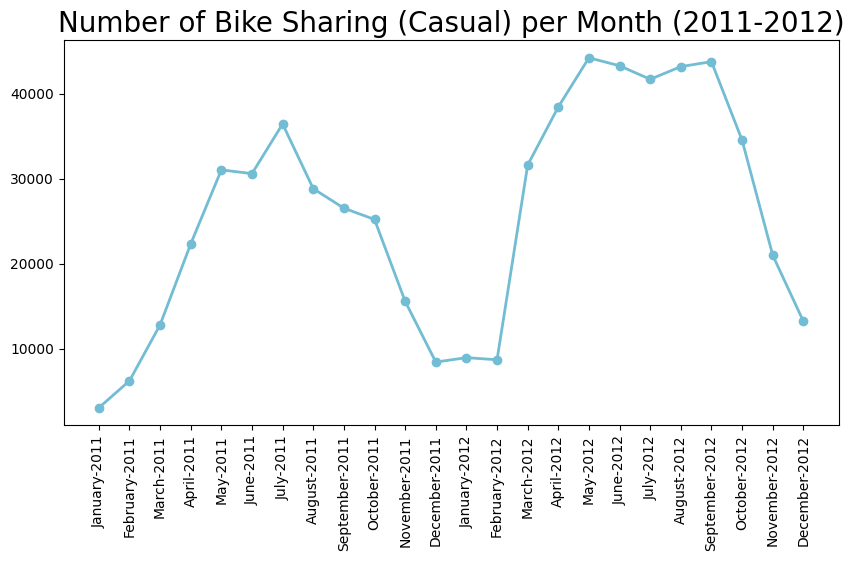

In [ ]:
#Memunculkan diagram garis pengguna berbagi sepeda bertipe casual perbulan
plt.figure(figsize=(10, 5))
plt.plot(monthly_sharing_df["dteday"], monthly_sharing_df["casual"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Bike Sharing (Casual) per Month (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.show()

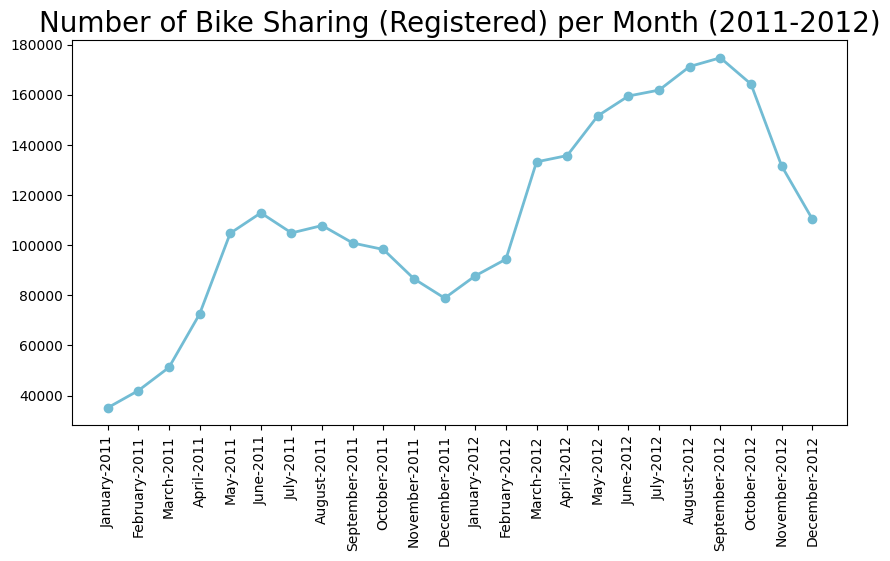

In [ ]:
#Memunculkan diagram garis pengguna berbagi sepeda bertipe registered perbulan
plt.figure(figsize=(10, 5))
plt.plot(monthly_sharing_df["dteday"], monthly_sharing_df["registered"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Bike Sharing (Registered) per Month (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.show()

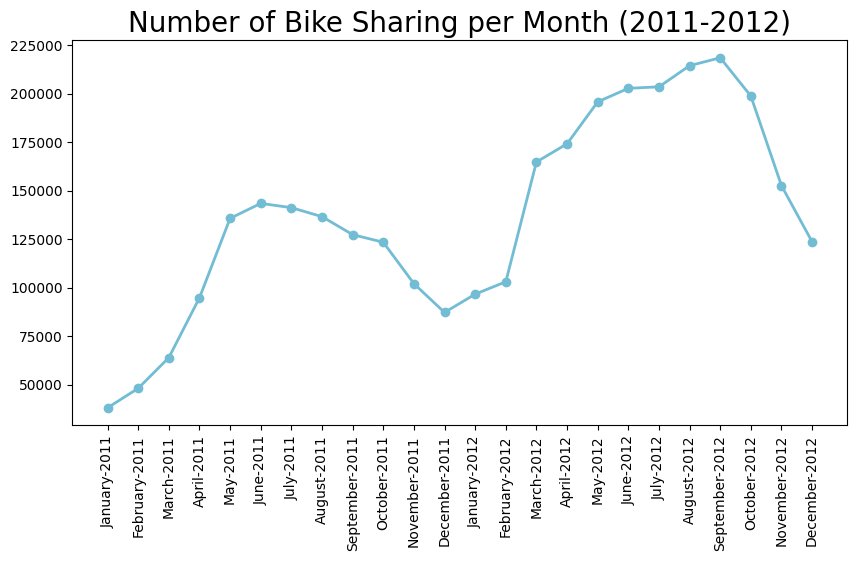

In [ ]:
#Memunculkan diagram garis pengguna berbagi sepeda perbulan
plt.figure(figsize=(10, 5))
plt.plot(monthly_sharing_df["dteday"], monthly_sharing_df["cnt"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Bike Sharing per Month (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_hour_df berdasarkan minggu dan tahun
weekly_sharing_df = day_hour_df.resample(rule='W', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})
weekly_sharing_df.index = weekly_sharing_df.index.strftime('%U-%Y') #Untuk mengubah kolom dteday dalam format Minggu-Tahun
weekly_sharing_df = weekly_sharing_df.reset_index() #Untuk mengurutkan ulang data dalam tabel weekly_sharing_df
weekly_sharing_df.head() #Untuk menampilkan 5 baris pertama dari DataFrame weekly_sharing_df

,dteday,casual,registered,cnt
0,01-2011,462,1324,1786
1,02-2011,668,8740,9408
2,03-2011,674,8351,9025
3,04-2011,605,8165,8770
4,05-2011,622,7077,7699


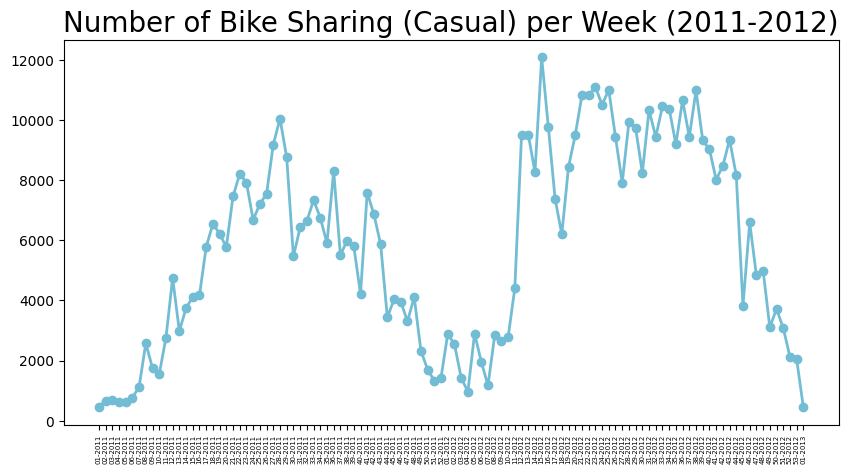

In [ ]:
#Memunculkan diagram garis pengguna berbagi sepeda bertipe casual perminggu
plt.figure(figsize=(10, 5))
plt.plot(weekly_sharing_df["dteday"], weekly_sharing_df["casual"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Bike Sharing (Casual) per Week (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.tick_params(axis='x',which='major',labelsize=5)
plt.show()

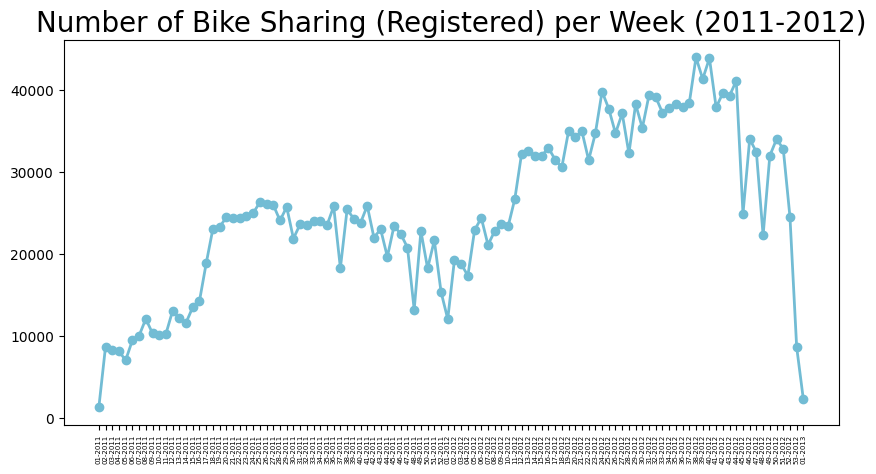

In [ ]:
#Memunculkan diagram garis pengguna berbagi sepeda bertipe registered perminggu
plt.figure(figsize=(10, 5))
plt.plot(weekly_sharing_df["dteday"], weekly_sharing_df["registered"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Bike Sharing (Registered) per Week (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.tick_params(axis='x',which='major',labelsize=5)
plt.show()

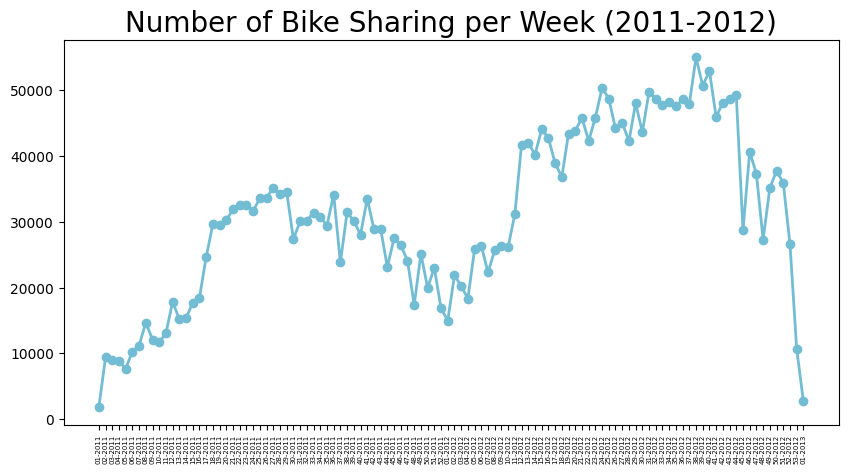

In [ ]:
#Memunculkan diagram garis pengguna berbagi sepeda perminggu
plt.figure(figsize=(10, 5))
plt.plot(weekly_sharing_df["dteday"], weekly_sharing_df["cnt"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Bike Sharing per Week (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.tick_params(axis='x',which='major',labelsize=5)
plt.show()

**Insight**
- Jumlah pengguna berbagi sepeda bertipe casual paling banyak pada bulan Mei tahun 2012 dan paling sedikit pada bulan Januari 2011
- Jumlah pengguna berbagi sepeda bertipe registered paling banyak pada bulan September tahun 2012 dan paling sedikit pada bulan Januari 2011
- Jumlah pengguna berbagi sepeda paling banyak pada bulan September tahun 2012 dan paling sedikit pada bulan Januari 2011
- Jumlah pengguna berbagi sepeda bertipe casual paling banyak pada minggu ke-15 tahun 2012 dan paling sedikit pada minggu ke-1 tahun 2013
- Jumlah pengguna berbagi sepeda bertipe registered paling banyak pada minggu ke-38 tahun 2012 dan paling sedikit pada minggu ke-1 tahun 2011
- Jumlah pengguna berbagi sepeda paling banyak pada minggu ke-38 tahun 2012 dan paling sedikit pada minggu ke-1 tahun 2011

### Pertanyaan 2: Bagaimana tren penggunaan berbagi sepeda berdasarkan jam, hari, bulan, dan tahun?

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_hour_df berdasarkan kolom yr
yr_df = day_hour_df.groupby(by=["yr"], sort=False).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

yr_df

,casual,registered,cnt
yr,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


<ipython-input-45-9a3ec785c0ae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


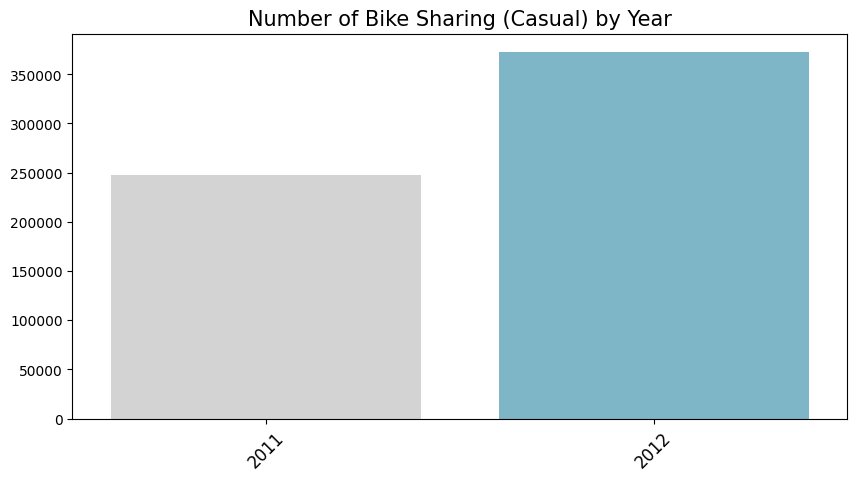

In [ ]:
#Memunculkan diagram batang pengguna berbagi sepeda (casual) berdasarkan pengelompokkan tahun
colors = ["#D3D3D3", "#72BCD4"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="casual",
    x="yr",
    data=yr_df,
    palette=colors
)
plt.title("Number of Bike Sharing (Casual) by Year", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-46-9ec40d267459>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


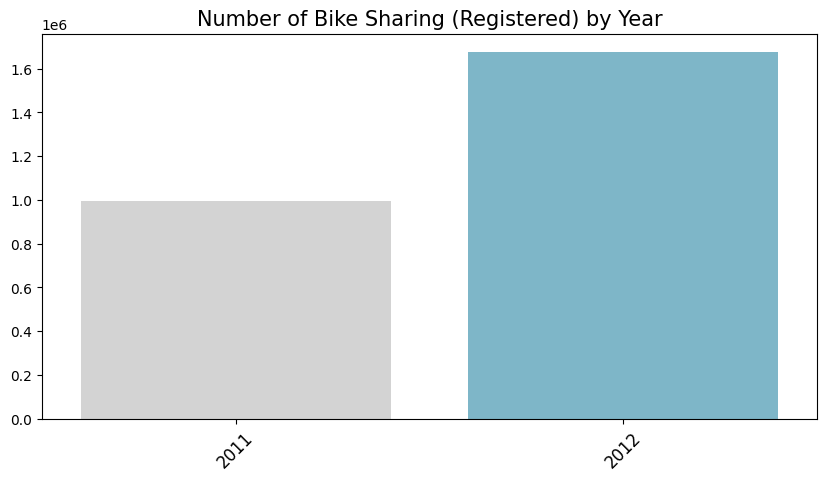

In [ ]:
#Memunculkan diagram batang pengguna berbagi sepeda (registered) berdasarkan pengelompokkan tahun
colors = ["#D3D3D3", "#72BCD4"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="registered",
    x="yr",
    data=yr_df,
    palette=colors
)
plt.title("Number of Bike Sharing (Registered) by Year", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-47-8d90bf5f6895>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


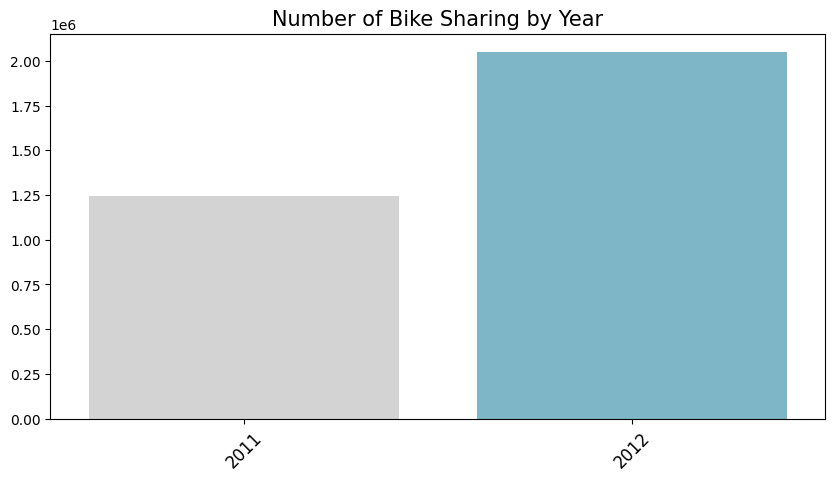

In [ ]:
#Memunculkan diagram batang pengguna berbagi sepeda berdasarkan pengelompokkan tahun
colors = ["#D3D3D3", "#72BCD4"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="cnt",
    x="yr",
    data=yr_df,
    palette=colors
)
plt.title("Number of Bike Sharing by Year", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_hour_df berdasarkan kolom mnth
mnth_df = day_hour_df.groupby(by=["mnth"], sort=False).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

mnth_df.head()

,casual,registered,cnt
mnth,,,
January,12042,122891,134933
February,14963,136389,151352
March,44444,184476,228920
April,60802,208292,269094
May,75285,256401,331686


<ipython-input-49-01082865927d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


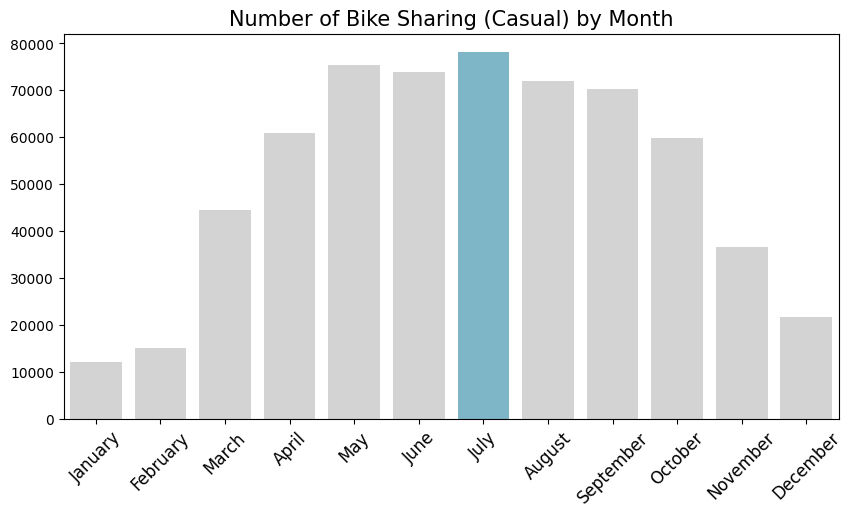

In [ ]:
#Memunculkan diagram batang pengguna berbagi sepeda (casual) berdasarkan pengelompokkan bulan
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="casual",
    x="mnth",
    data=mnth_df,
    palette=colors
)
plt.title("Number of Bike Sharing (Casual) by Month", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-50-4ebc14830b66>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


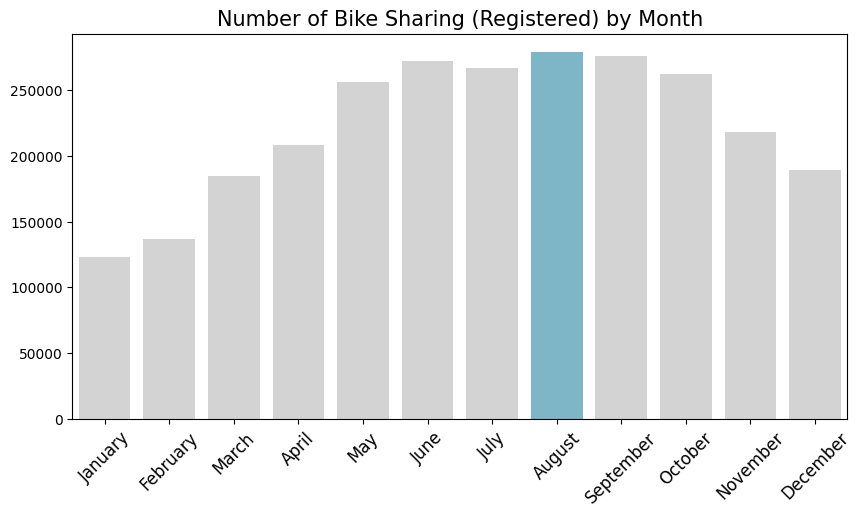

In [ ]:
#Memunculkan diagram batang pengguna berbagi sepeda (registered) berdasarkan pengelompokkan bulan
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="registered",
    x="mnth",
    data=mnth_df,
    palette=colors
)
plt.title("Number of Bike Sharing (Registered) by Month", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-51-eaf43cb6aeb8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


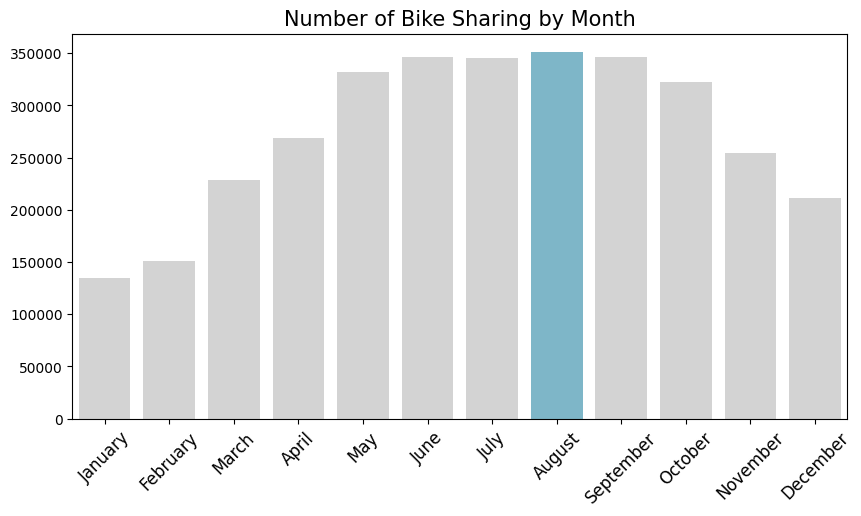

In [ ]:
#Memunculkan diagram batang pengguna berbagi sepeda berdasarkan pengelompokkan bulan
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="cnt",
    x="mnth",
    data=mnth_df,
    palette=colors
)
plt.title("Number of Bike Sharing by Month", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_hour_df berdasarkan kolom weekday
weekday_df = day_hour_df.groupby(by=["weekday"], sort=False).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reindex(days)

weekday_df.head()

,casual,registered,cnt
weekday,,,
Monday,70784,384719,455503
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048
Thursday,61460,423935,485395
Friday,78238,409552,487790


<ipython-input-53-ced0a88bb1f9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


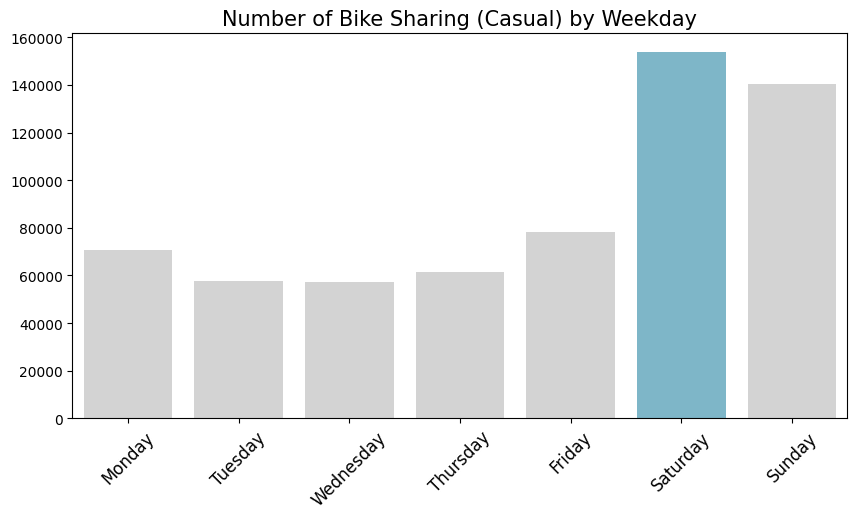

In [ ]:
#Memunculkan diagram batang pengguna berbagi sepeda (casual) berdasarkan pengelompokkan hari
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="casual",
    x="weekday",
    data=weekday_df,
    palette=colors
)
plt.title("Number of Bike Sharing (Casual) by Weekday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-54-21fc7e791ff8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


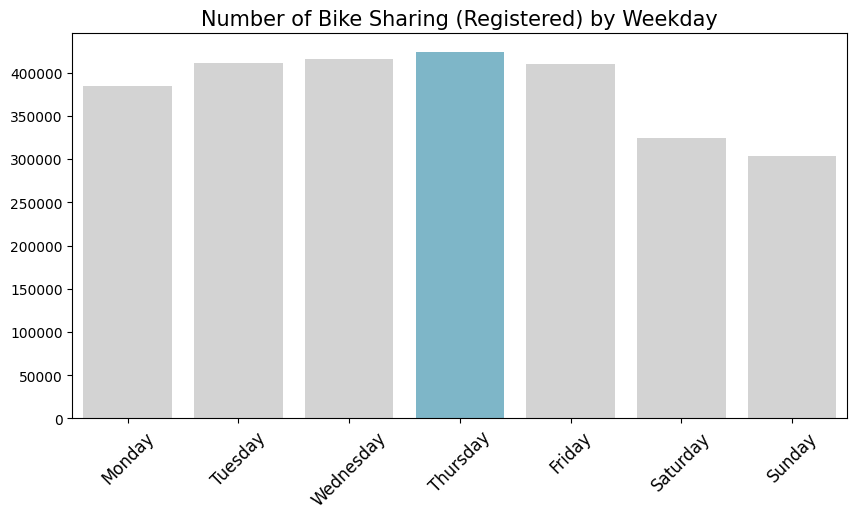

In [ ]:
#Memunculkan diagram batang pengguna berbagi sepeda (registered) berdasarkan pengelompokkan hari
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="registered",
    x="weekday",
    data=weekday_df,
    palette=colors
)
plt.title("Number of Bike Sharing (Registered) by Weekday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-55-3574effaef6f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


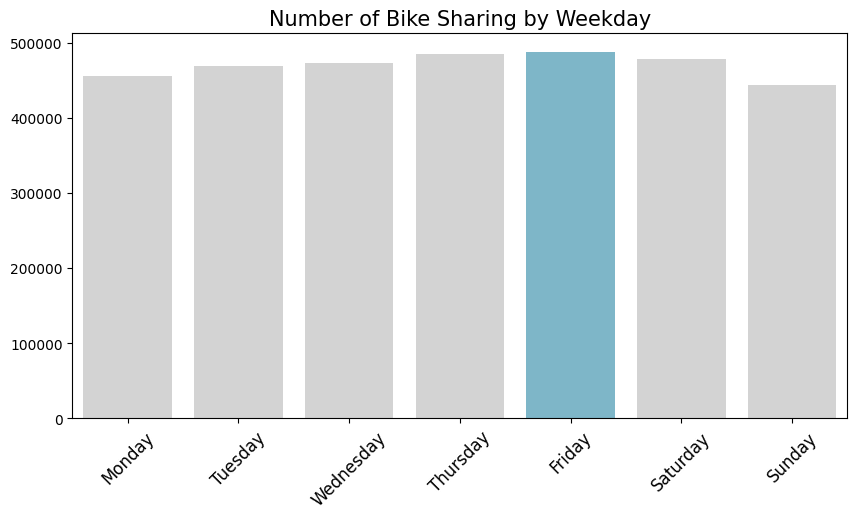

In [ ]:
#Memunculkan diagram batang pengguna berbagi sepeda berdasarkan pengelompokkan hari
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="cnt",
    x="weekday",
    data=weekday_df,
    palette=colors
)
plt.title("Number of Bike Sharing by Weekday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_hour_df berdasarkan kolom hr
hr_df = day_hour_df.groupby(by=["hr"], sort=False).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

hr_df.head()

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428


<ipython-input-57-f8b7a5b7fc2d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


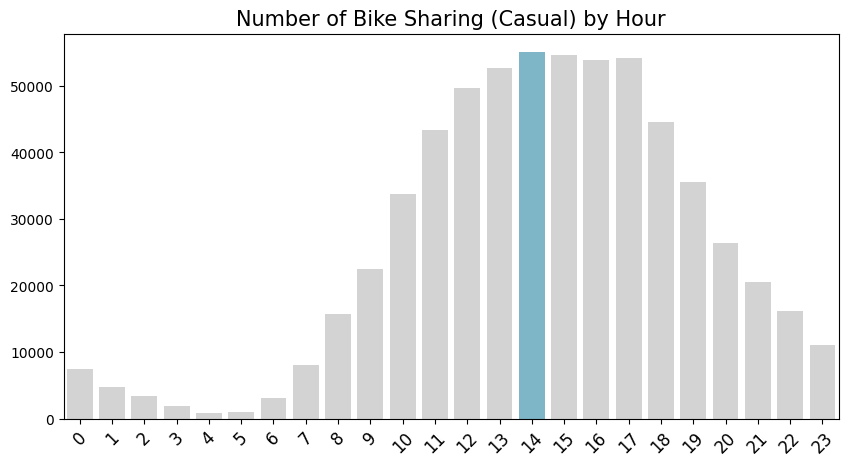

In [ ]:
#Memunculkan diagram batang pengguna berbagi sepeda (casual) berdasarkan pengelompokkan jam
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="casual",
    x="hr",
    data=hr_df.sort_values(by="cnt", ascending=False),
    palette=colors
)
plt.title("Number of Bike Sharing (Casual) by Hour", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-58-7a4cb7beaa63>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


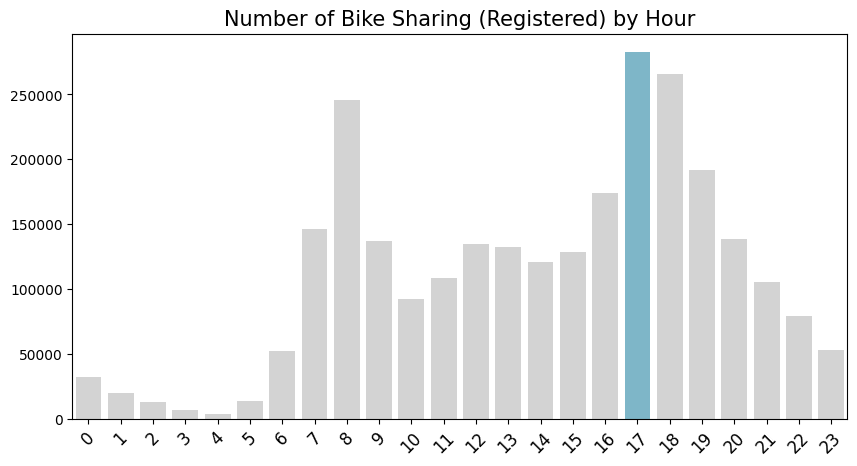

In [ ]:
#Memunculkan diagram batang pengguna berbagi sepeda (registered) berdasarkan pengelompokkan jam
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="registered",
    x="hr",
    data=hr_df.sort_values(by="cnt", ascending=False),
    palette=colors
)
plt.title("Number of Bike Sharing (Registered) by Hour", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-59-7d89fffcfff8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


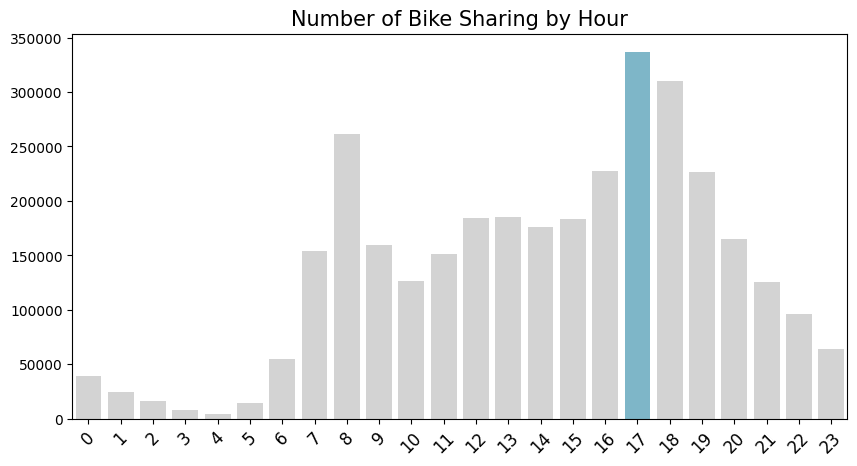

In [ ]:
#Memunculkan diagram batang pengguna berbagi sepeda berdasarkan pengelompokkan jam
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="cnt",
    x="hr",
    data=hr_df.sort_values(by="cnt", ascending=False),
    palette=colors
)
plt.title("Number of Bike Sharing by Hour", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

**Insight**
- Jumlah pengguna berbagi sepeda bertipe casual, registered, maupun secara keseluruhan pada tahun 2012 lebih banyak dibandingkan pada tahun 2011
- Jumlah pengguna berbagi sepeda bertipe casual paling banyak terdapat pada bulan Juli, sedangkan paling sedikit terdapat pada bulan Januari
- Jumlah pengguna berbagi sepeda bertipe registered paling banyak terdapat pada bulan Agustus, sedangkan paling sedikit terdapat pada bulan Januari
- Jumlah pengguna berbagi sepeda paling banyak terdapat pada bulan Agustus, sedangkan paling sedikit terdapat pada bulan Januari
- Jumlah pengguna berbagi sepeda bertipe casual paling banyak pada saat hari Sabtu, sedangkan paling sedikit pada saat hari Rabu
- Jumlah pengguna berbagi sepeda bertipe registered paling banyak pada saat hari Kamis, sedangkan paling sedikit pada saat hari Minggu
- Jumlah pengguna berbagi sepeda paling banyak pada saat hari Jumat, sedangkan paling sedikit pada saat hari Minggu
- Jumlah pengguna berbagi sepeda bertipe casual paling banyak saat pukul 14.00, sedangkan paling sedikit saat pukul 4.00
- Jumlah pengguna berbagi sepeda bertipe registered paling banyak saat pukul 17.00, sedangkan paling sedikit saat pukul 4.00
- Jumlah pengguna berbagi sepeda paling banyak saat pukul 17.00, sedangkan paling sedikit saat pukul 4.00

### Pertanyaan 3: Bagaimana tren penggunaan berbagi sepeda pada saat hari libur atau bukan hari libur dan pada saat hari kerja atau bukan hari kerja?

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_hour_df berdasarkan kolom holiday
holiday_df = day_hour_df.groupby(by=["holiday"], sort=False).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

holiday_df

,casual,registered,cnt
holiday,,,
not holiday,597658,2616586,3214244
holiday,22359,56076,78435


<ipython-input-61-c5d9266dc3fd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


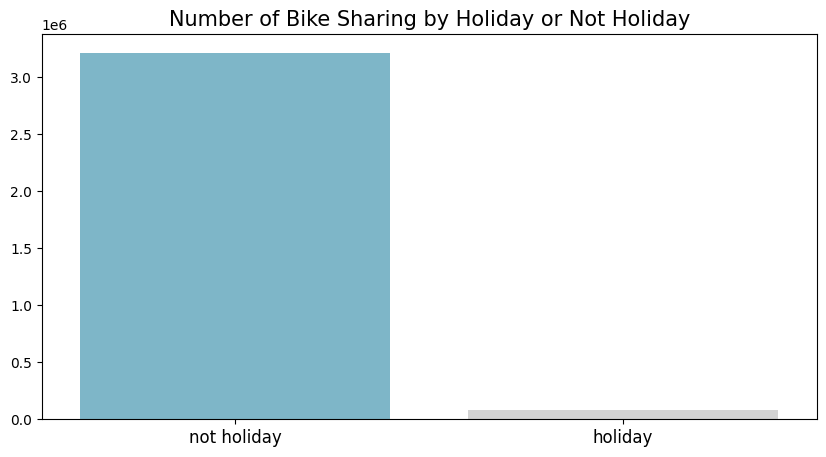

In [ ]:
#Memunculkan diagram batang pengguna berbagi sepeda berdasarkan pengelompokkan hari libur atau bukan hari libur
colors = ["#72BCD4", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="cnt",
    x="holiday",
    data=holiday_df.sort_values(by="cnt", ascending=False),
    palette=colors
)
plt.title("Number of Bike Sharing by Holiday or Not Holiday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_hour_df berdasarkan kolom workingday
workingday_df = day_hour_df.groupby(by=["workingday"], sort=False).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

workingday_df

,casual,registered,cnt
workingday,,,
not workingday,316732,683537,1000269
workingday,303285,1989125,2292410


<ipython-input-64-6cea8be62150>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


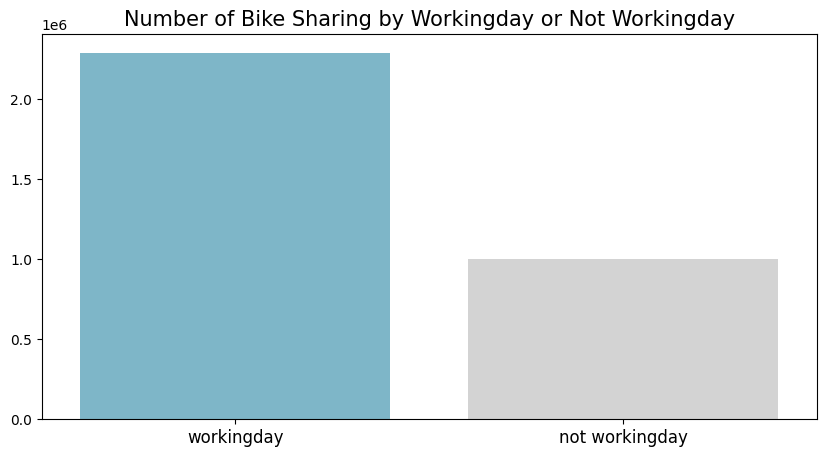

In [ ]:
#Memunculkan diagram batang pengguna berbagi sepeda berdasarkan pengelompokkan hari kerja atau bukan hari kerja
colors = ["#72BCD4", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="cnt",
    x="workingday",
    data=workingday_df.sort_values(by="cnt", ascending=False),
    palette=colors
)
plt.title("Number of Bike Sharing by Workingday or Not Workingday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=0)
plt.show()

**Insight**
- Jumlah pengguna berbagi sepeda lebih banyak pada saat bukan hari libur dibandingkan pada saat hari libur
- Jumlah pengguna berbagi sepeda lebih banyak pada saat hari kerja dibandingkan pada saat bukan hari kerja

### Pertanyaan 4: Bagaimana pengaruh musim dalam penggunaan berbagi sepeda?

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_hour_df berdasarkan kolom season
season_df = day_hour_df.groupby(by=["season"], sort=False).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

season_df

,casual,registered,cnt
season,,,
spring,60622,410726,471348
summer,203522,715067,918589
fall,226091,835038,1061129
winter,129782,711831,841613


<ipython-input-66-9269491158aa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


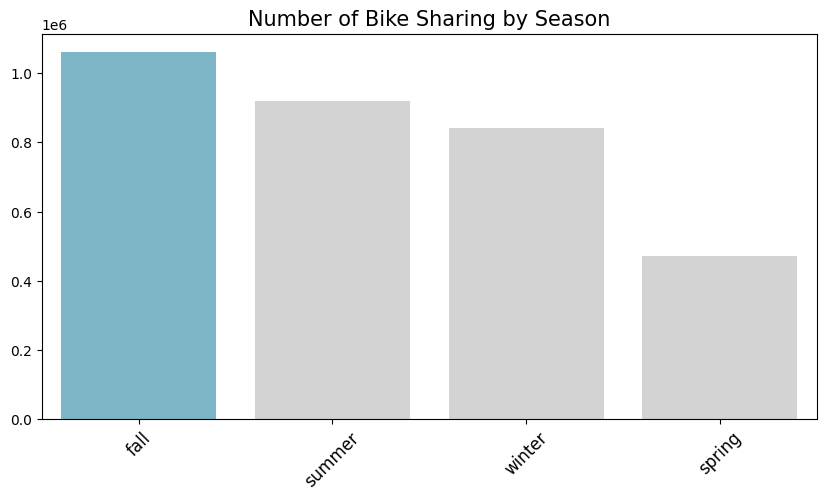

In [ ]:
#Memunculkan diagram batang pengguna berbagi sepeda berdasarkan pengelompokkan musim
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="cnt",
    x="season",
    data=season_df.sort_values(by="cnt", ascending=False),
    palette=colors
)
plt.title("Number of Bike Sharing by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

**Insight**
- Jumlah pengguna berbagi sepeda paling banyak pada saat musim gugur dan paling sedikit pada saat cuaca musim semi

### Pertanyaan 5: Bagaimana kondisi cuaca memengaruhi penggunaan berbagi sepeda?

In [ ]:
#Untuk mengelompokkan data casual, registered, dan cnt dalam tabel day_hour_df berdasarkan kolom weather
weather_df = day_hour_df.groupby(by=["weathersit"], sort=False).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weather_df

,casual,registered,cnt
weathersit,,,
clear,462745,1875428,2338173
mist,134481,661471,795952
light rain,22783,135548,158331
heavy rain,8,215,223


<ipython-input-68-b65cc1fce406>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


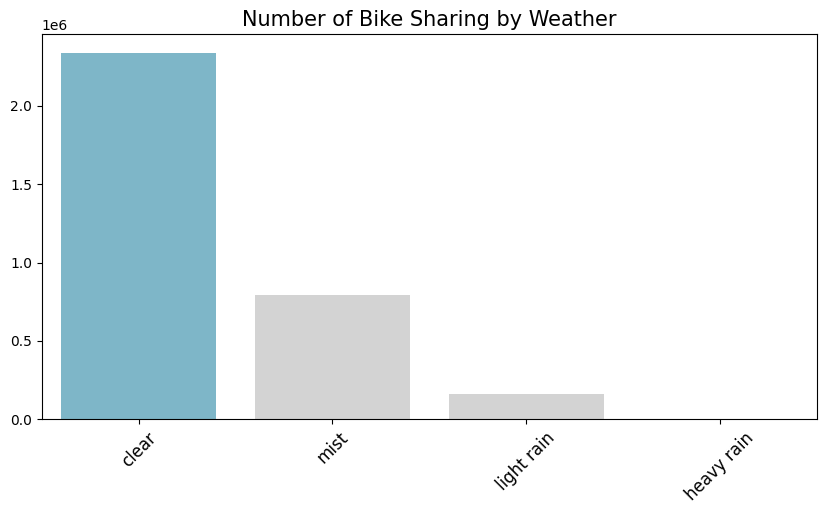

In [ ]:
#Memunculkan diagram batang pengguna berbagi sepeda berdasarkan pengelompokkan cuaca
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="cnt",
    x="weathersit",
    data=weather_df.sort_values(by="cnt", ascending=False),
    palette=colors
)
plt.title("Number of Bike Sharing by Weather", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Jumlah pengguna berbagi sepeda paling banyak pada saat cuaca cerah dan paling sedikit pada saat cuaca hujan lebat

## Conclusion

- Dari hasil visualization & explanatory analysis diperoleh bahwa jumlah pengguna berbagi sepeda paling banyak pada bulan September tahun 2012 serta pada minggu ke-38 tahun 2012
- Dari hasil visualization & explanatory analysis diperoleh bahwa jumlah pengguna berbagi sepeda pada saat tahun 2012 lebih banyak dibandingkan pada saat tahun 2011. Selain itu, jumlah pengguna berbagi sepeda paling banyak pada saat bulan Agustus, pada saat hari Jumat, dan pada saat pukul 17.00
- Dari hasil visualization & explanatory analysis diperoleh bahwa jumlah pengguna berbagi sepeda pada saat bukan hari libur lebih banyak dibandingkan pada saat hari libur serta jumlah pengguna berbagi sepeda pada saat hari kerja juga lebih banyak dibandingkan pada saat bukan hari kerja
- Dari hasil visualization & explanatory analysis diperoleh bahwa musim memengaruhi penggunaan berbagi sepeda yang di mana jumlah pengguna berbagi sepeda paling banyak pada saat musim gugur dan paling sedikit pada saat musim semi serta pada saat musim panas jumlah pengguna berbagi sepeda lebih banyak dibandingkan pada saat musim dingin
- Dari hasil visualization & explanatory analysis diperoleh bahwa kondisi cuaca memengaruhi penggunaan berbagi sepeda yang di mana jumlah pengguna berbagi sepeda paling banyak pada saat cuaca cerah dan paling sedikit pada saat cuaca hujan lebat

In [ ]:
#Untuk menyimpan tabel day_hour dalam format csv
day_hour_df.to_csv("day_hour_data.csv", index=False)